In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from matplotlib.colors import LinearSegmentedColormap

In [36]:
###################
###################
S_transitive = pd.read_csv('Stransitive.csv')
S_transitive['check'] = S_transitive.apply(lambda x: x['sequence'][x['seq_position']]==x['ref_residue'], axis = 1)
S_transitive[S_transitive['check']]
S_transitive['MTS'] = S_transitive.apply(lambda x: x['ref_residue']+str(x['seq_position']+1)+x['mutated_residue'], axis=1)
S_transitive = S_transitive.rename(columns={'id':'ID', 'sequence':'Sequence', 'ddG':'DDG'})

S_transitive = S_transitive[['ID','MTS','DDG','Sequence']]
S_transitive.to_csv('../git_JANUS_DDG/Data/Stransitive_to_process.csv')
#################
#################

/tmp/ipykernel_248391/4143927294.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


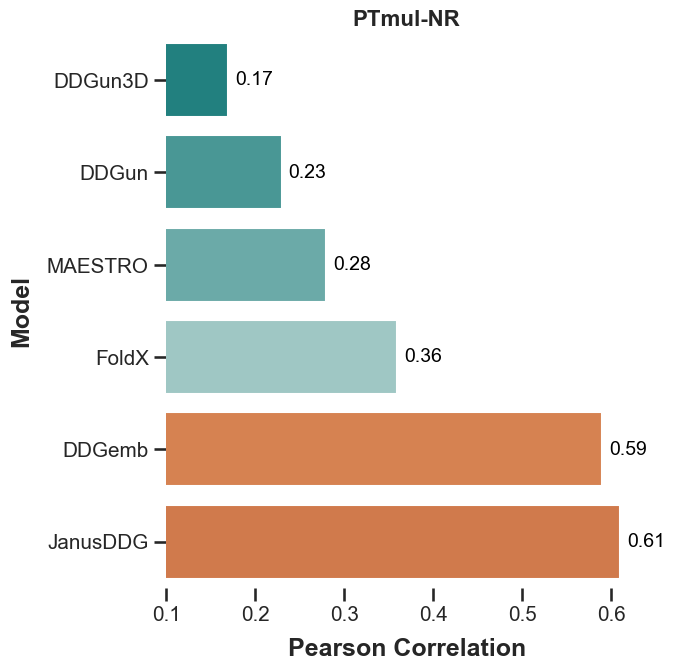

In [97]:
# Creiamo un dizionario con i dati
data = {
    "Model": [
        "JanusDDG","DDGemb","FoldX","MAESTRO","DDGun","DDGun3D"
    ],
    "Pearson": [0.61, 0.59, 0.36, 0.28, 0.23, 0.17
    ]
}


df_s669 =pd.DataFrame(data)


# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_s669.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.1)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"PTmul-NR", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()




/tmp/ipykernel_248391/1511988074.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


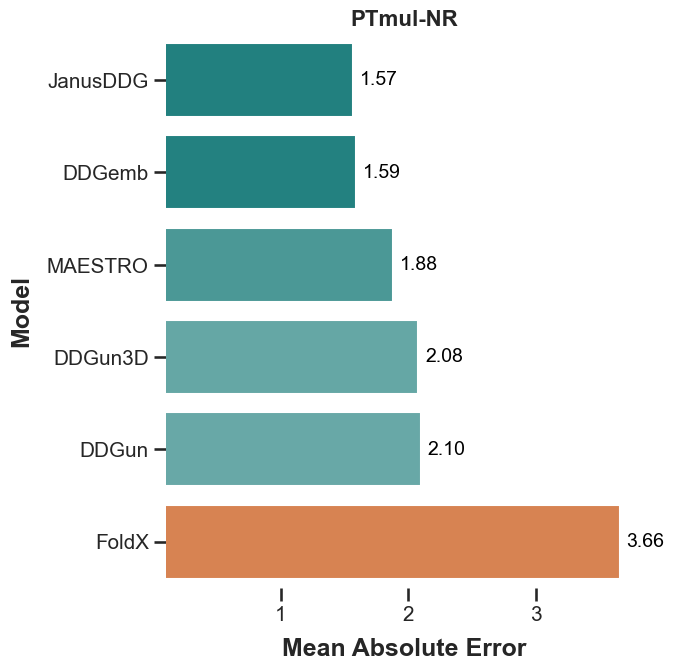

In [98]:
# Creiamo un dizionario con i dati
data = {
    "Model": [
        "JanusDDG","DDGemb","FoldX","MAESTRO","DDGun","DDGun3D"
    ],
    "MAE": [1.57, 1.59, 3.66, 1.88, 2.10, 2.08
    ]
}


df_s669 =pd.DataFrame(data)


# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_s669.sort_values(by="MAE")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["MAE"].min(), df_plot_pearson["MAE"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["MAE"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="MAE",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Mean Absolute Error", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.1)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"PTmul-NR", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()



/tmp/ipykernel_248391/2603898183.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


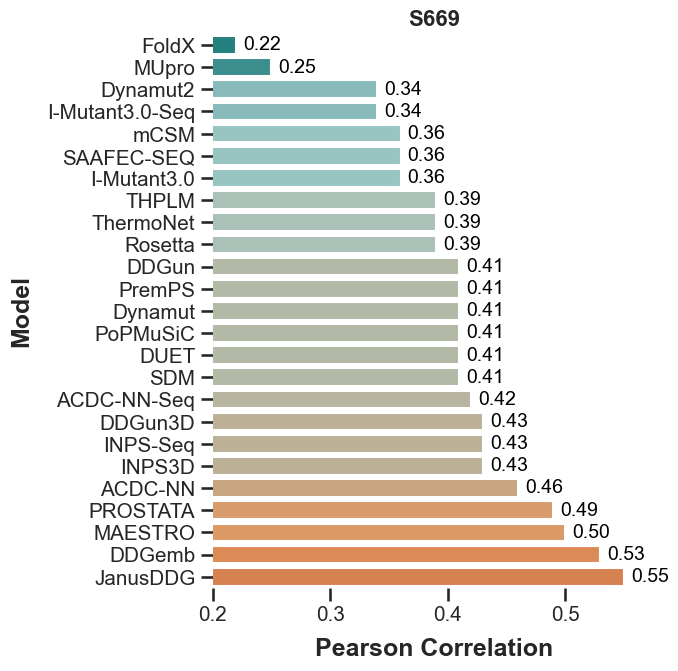

In [49]:
# Creiamo un dizionario con i dati
data = {
    "Model": [
        'JanusDDG',"DDGemb", "PROSTATA", "ACDC-NN", "INPS-Seq", "PremPS",
        "ACDC-NN-Seq", "DDGun3D", "INPS3D", "THPLM", "ThermoNet", "DDGun", "MAESTRO",
         "Dynamut", "PoPMuSiC", "DUET", "I-Mutant3.0-Seq", "SDM", "mCSM", "Dynamut2",
        "I-Mutant3.0", "Rosetta", "FoldX", "SAAFEC-SEQ", "MUpro"
    ],
    "Pearson": [
        0.55, 0.53, 0.49, 0.46, 0.43, 0.41, 0.42, 0.43,
        0.43, 0.39, 0.39, 0.41, 0.50,
        0.41, 0.41, 0.41,
        0.34, 0.41,
        0.36, 0.34, 0.36, 0.39, 0.22, 0.36, 0.25,
    ]
}

janus_pearson=0.55
janus_spearman=0.55

df_s669 =pd.DataFrame(data)


# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_s669.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.2)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"S669", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()




/tmp/ipykernel_248391/3199514351.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


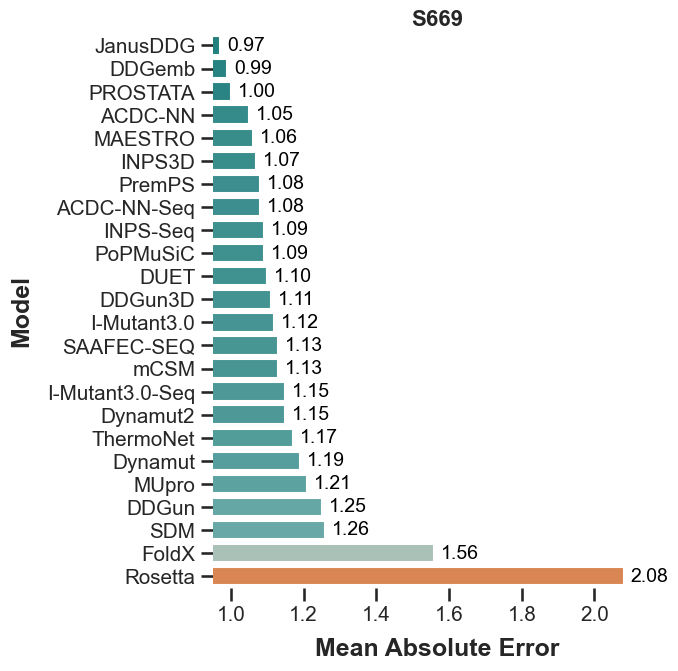

In [48]:
# # Creiamo un dizionario con i dati
data = {
    "Model": [
        'JanusDDG',"DDGemb", "PROSTATA", "ACDC-NN", "INPS-Seq", "PremPS",
        "ACDC-NN-Seq", "DDGun3D", "INPS3D", "ThermoNet", "DDGun", "MAESTRO",
         "Dynamut", "PoPMuSiC", "DUET", "I-Mutant3.0-Seq", "SDM", "mCSM", "Dynamut2",
        "I-Mutant3.0", "Rosetta", "FoldX", "SAAFEC-SEQ", "MUpro"
    ],
    "Pearson": [0.97,
                0.99,
                1.00,
                1.05,
                1.09,1.08,1.08,
                1.11,1.07,1.17,
                1.25,1.06,1.19,
                1.09, 1.1, 1.15,
                1.26,1.13,1.15,1.12,
                2.08,1.56,1.13,1.21
    ]
}


df_s669 =pd.DataFrame(data)


# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_s669.sort_values(by="Pearson",ascending=True)

# Definisce i colori della palette personalizzata
custom_colors =[ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Mean Absolute Error", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.95)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"S669", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()



In [52]:
#SELECT DATASET

DATASET = 'S461'

In [53]:
if DATASET == 'Ssym':
    dataset = pd.read_csv('../DeltaDeltaG/ssym_analysis.txt')
    columns_selected= ['KORPM','mpnn_20_00','Cartddg','ACDC-NN',
               'stability-oracle','mifst','msa_transformer_mean',
               'mif','esm2_650M','ankh','tranception','esmif_multimer','DDGun3D',
               'FoldX','Evo','mutcomputex','INPS3D','esm1v_mean','ThermoNet','MAESTRO',
               'DUET','I-Mutant3.0','MUpro','mCSM','SDM','Dynamut']
    
    target_col = "DDG"

    #PERFORMANCE JANUS
    janus_pearson = 0.69
    janus_spearman = 0.68


elif DATASET == 'S96':
    dataset = pd.read_excel('s96_ddgemb.xlsx',header=1)

    columns_selected = ['DDGun', 'DDGun3D',	'INPS-MD',	'Maestro',	'mCSM',	'FoldX',	'INPS',	'POPMUSIC',	'SDM']
    target_col = "DDG"


elif DATASET == 'S461':
    dataset = pd.read_csv('../git_JANUS_DDG/Results/Result_s461_dir_analysis.csv')

    columns_selected = ['DDG_JanusDDG',
     "stability-oracle_dir","CartddgD_dir","PremPS_dir","PopMusic_dir","MAESTRO_dir",
    "INPS3D_dir","DDGun3D_dir","DUET_dir","ACDC-NN_dir","KORPMD_dir","mCSM_dir",
    "SDM_dir","ThermoNet_dir","I-Mutant3.0_dir","SAAFEC-Seq_dir", "mif_dir","ankh_dir",
    "esm2_650M_dir","Dynamut_dir","mpnn_20_00_dir","esm1v_mean_dir",
    "esmif_multimer_dir","mifst_dir","mutcomputex_dir","FoldXD_dir","tranception_dir","msa_transformer_mean_dir",
    ]
    target_col = "DDG"

    #PERFORMANCE JANUS
    janus_pearson = 0.70
    janus_spearman = 0.66

elif DATASET == 'Q3421':
    dataset = pd.read_csv('../DeltaDeltaG/q3421_analysis.txt')

    columns_selected=['stability-oracle_dir',
                    'K1566_pslm_rfa_2_dir',
                    'K1566_pslm_rfa_3_dir',
                    'K1566_pslm_rfa_4_dir',
                    'K1566_pslm_rfa_5_dir',
                    'K1566_pslm_rfa_6_dir',
                    'K1566_pslm_rfa_7_dir',
                  'korpm_dir', 'mutcomputex_dir','esmif_monomer_dir','esmif_multimer_dir',
                  'tranception_dir','mpnn_10_00_dir','mpnn_20_00_dir','mpnn_30_00_dir',
                  'esm2_150M_dir','mif_dir','esm1v_mean_dir','cartesian_ddg_dir','esm2_650M_dir',
                  'mifst_dir','ankh_dir','msa_transformer_mean_dir','esm2_3B_dir','esm2_15B_half_dir',
                 ]
    target_col = "ddG"

    #PERFORMANCE JANUS
    janus_pearson = 0.69
    janus_spearman = 0.79

elif DATASET == 'k2369':
    dataset = pd.read_csv('../DeltaDeltaG/k2369_analysis.txt')

    columns_selected= ['K1566_pslm_rfa_2_dir',
                    'K1566_pslm_rfa_3_dir',
                    'K1566_pslm_rfa_4_dir',
                    'K1566_pslm_rfa_5_dir',
                    'K1566_pslm_rfa_6_dir',
                    'K1566_pslm_rfa_7_dir',
                    'stability-oracle_dir','korpm_dir','esmif_multimer_dir',
                   'esmif_monomer_dir','tranception_dir','mpnn_10_00_dir','mpnn_20_00_dir',
                   'mpnn_30_00_dir','esm2_150M_dir','esm1v_mean_dir',
                   'esm2_650M_dir','mif_dir','cartesian_ddg_dir','msa_transformer_mean_dir',
                   'mifst_dir',
                   'ankh_dir','esm2_3B_dir',
                    'esm2_15B_half_dir'
    
]

    
    target_col = "ddG"

    #PERFORMANCE JANUS
    janus_pearson = 0.
    janus_spearman = 0.


else:
    assert False

In [54]:
df_selected

,JanusDDG,stability-oracle_dir,CartddgD_dir,PremPS_dir,PopMusic_dir,MAESTRO_dir,INPS3D_dir,DDGun3D_dir,DUET_dir,ACDC-NN_dir,...,Dynamut_dir,mpnn_20_00_dir,esm1v_mean_dir,esmif_multimer_dir,mifst_dir,mutcomputex_dir,FoldXD_dir,tranception_dir,msa_transformer_mean_dir,DDG
0,-0.127955,-0.103,1.45,-0.44,-1.04,-0.761365,-0.114506,0.5,-0.466,0.225406,...,0.545,-2.593541,-4.624630,-0.017453,-9.079479,-0.906813,0.48,-0.018765,-2.473579,-1.800
1,-0.636893,-0.950,-4.47,-1.72,-1.19,-0.160758,-2.018710,-1.2,-1.757,-0.230352,...,0.160,-3.647010,-5.599477,-0.011513,-5.932082,-0.499039,-0.86,-0.007958,-5.515070,-1.745
2,-0.239103,-0.040,0.64,-0.42,0.07,0.047077,-0.026759,-0.1,-0.252,-0.040138,...,-0.193,1.273386,0.657707,0.004294,1.415697,0.029220,-0.13,0.003863,0.514193,0.287
3,0.197891,0.025,0.86,-0.35,0.26,-0.291217,0.185293,-0.1,0.358,0.201055,...,0.190,2.620539,2.805196,0.005098,2.924172,0.121793,0.19,0.003370,3.111199,-0.287
4,0.351094,-0.065,-1.08,-0.22,0.29,-0.805692,-0.284797,0.0,0.287,0.230963,...,-0.138,-0.604758,-2.319281,-0.004893,-2.145448,-0.010539,0.30,-0.002460,-0.890877,-0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,-1.357574,-0.155,-2.20,-0.99,-0.83,0.317676,-0.471468,-0.4,-0.021,-0.728433,...,-0.133,-1.105547,0.003028,-0.046678,-3.275250,-0.037434,-0.04,0.021470,1.028863,0.060
457,-0.154495,-0.046,0.59,-1.18,-0.46,0.577030,0.031818,-0.3,-0.518,-0.345831,...,-0.119,0.482251,1.015892,0.024325,0.532605,0.039233,0.04,0.023775,0.065515,-0.460
458,-0.312050,0.026,-4.72,-0.20,-0.05,-0.443163,-0.461999,-0.3,0.254,-0.134107,...,0.694,-0.347571,-9.233602,-0.015946,-11.341687,-0.177725,-0.85,-0.008806,-8.707702,-1.440
459,-0.164728,-0.164,-8.00,0.13,-0.06,0.062118,-0.566342,-0.2,0.362,0.134216,...,0.390,-3.173122,-15.449692,-0.035418,-15.840406,-0.171720,-0.97,-0.017972,-13.558142,-1.440


In [55]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Selezionare solo le colonne dei modelli e il valore vero (ddG_dir)
df_selected = dataset.loc[:, columns_selected + [target_col]]#.fillna(0)
df_selected = df_selected.rename(columns={'DDG_JanusDDG':'JanusDDG'})
# Dizionario per salvare i risultati
results = {}
columns_selected = ['JanusDDG',
     "stability-oracle_dir","CartddgD_dir","PremPS_dir","PopMusic_dir","MAESTRO_dir",
    "INPS3D_dir","DDGun3D_dir","DUET_dir","ACDC-NN_dir","KORPMD_dir","mCSM_dir",
    "SDM_dir","ThermoNet_dir","I-Mutant3.0_dir","SAAFEC-Seq_dir", "mif_dir","ankh_dir",
    "esm2_650M_dir","Dynamut_dir","mpnn_20_00_dir","esm1v_mean_dir",
    "esmif_multimer_dir","mifst_dir","mutcomputex_dir","FoldXD_dir","tranception_dir","msa_transformer_mean_dir",
    ]
# Calcolare le metriche per ogni modello
for model in columns_selected:
    y_true = df_selected.dropna(subset=[model])[target_col]
    y_pred = df_selected.dropna(subset=[model])[model]
    
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    results[model] = {
        'Pearson': round(pearson_corr,2),
        'Spearman': round(spearman_corr,2),
        'RMSE': round(rmse,2),
        'MAE': round(mae,2),
    }

# results['JanusDDG'] = {'Pearson': 0.69,
#         'Spearman': 0.68,
#         'RMSE': 1.43,
#         'MAE': 0.94
#     }
    


# Convertire in DataFrame per stampa leggibile
results_df = pd.DataFrame(results).T
print(results_df)


                          Pearson  Spearman  RMSE   MAE
JanusDDG                     0.69      0.66  0.96  0.71
stability-oracle_dir         0.62      0.63  1.19  0.89
CartddgD_dir                 0.60      0.61  3.59  2.93
PremPS_dir                   0.63      0.60  1.03  0.80
PopMusic_dir                 0.61      0.60  1.02  0.76
MAESTRO_dir                  0.63      0.60  1.04  0.79
INPS3D_dir                   0.61      0.59  1.02  0.76
DDGun3D_dir                  0.63      0.58  1.11  0.81
DUET_dir                     0.59      0.57  1.06  0.78
ACDC-NN_dir                  0.60      0.56  1.06  0.78
KORPMD_dir                   0.57      0.54  1.21  0.91
mCSM_dir                     0.53      0.51  1.07  0.81
SDM_dir                      0.56      0.51  1.33  1.02
ThermoNet_dir                0.55      0.48  1.24  0.93
I-Mutant3.0_dir              0.49      0.47  1.12  0.84
SAAFEC-Seq_dir               0.49      0.47  1.12  0.84
mif_dir                      0.45      0.46  4.3

In [56]:
results_df = results_df.reset_index()
results_df = results_df.rename(columns={'index':'Model'})
results_df['Model'] = results_df['Model'].map(lambda x:x.split('_dir')[0].upper()[0] + x.split('_dir')[0][1:] )

/tmp/ipykernel_289470/458230110.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


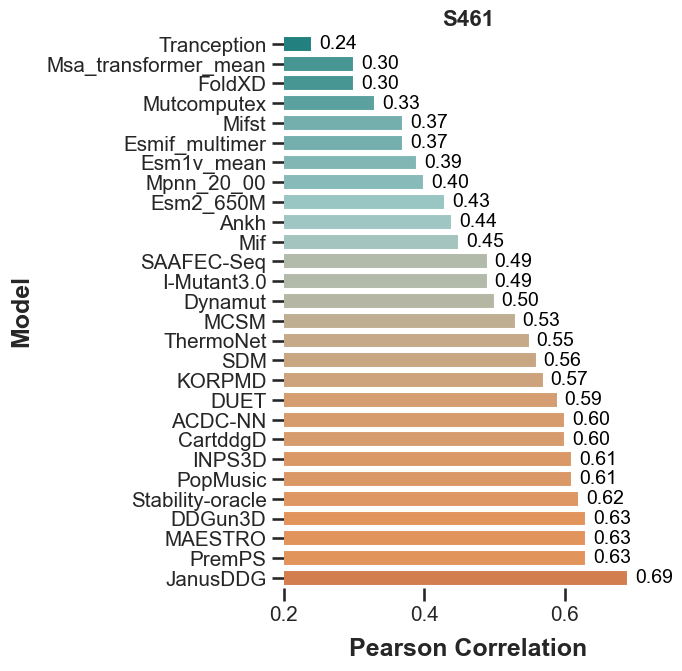

In [57]:
# Creiamo un dizionario con i dati


df =pd.DataFrame(results_df)


# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.2)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()



/tmp/ipykernel_289470/924412851.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


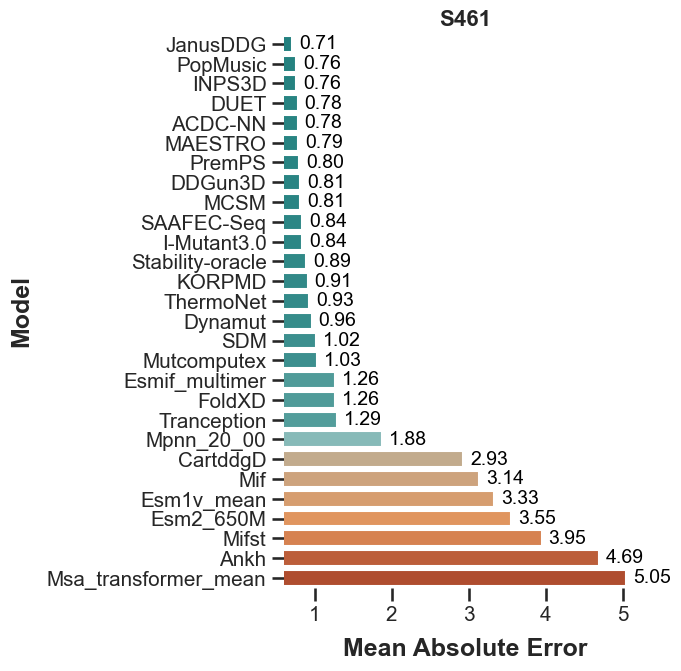

In [58]:
df =pd.DataFrame(results_df)

# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df.sort_values(by="MAE",ascending=True)

# Definisce i colori della palette personalizzata
custom_colors =[ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["MAE"].min(), df_plot_pearson["MAE"].max() )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["MAE"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    y="Model",
    x="MAE",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Mean Absolute Error", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
ax.set_xlim(0.6)
# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")
#ax.set_xscale('log')
# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()

In [50]:
columns_selected = ['stability-oracle_dir',
 'CartddgD_dir',
 'PremPS_dir',]

df1 =dataset.loc[:, columns_selected + ['ddG_dir']]#.fillna(0)
df1

,stability-oracle_dir,CartddgD_dir,PremPS_dir,ddG_dir
0,-0.103,1.45,-0.44,-1.800
1,-0.950,-4.47,-1.72,-1.745
2,-0.040,0.64,-0.42,0.287
3,0.025,0.86,-0.35,-0.287
4,-0.065,-1.08,-0.22,-0.263
...,...,...,...,...
456,-0.155,-2.20,-0.99,0.060
457,-0.046,0.59,-1.18,-0.460
458,0.026,-4.72,-0.20,-1.440
459,-0.164,-8.00,0.13,-1.440


In [1]:
######################à
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, accuracy_score

df2 = pd.read_csv('../git_JANUS_DDG/Results/Result_s461.csv')
columns_selected = ['stability-oracle_dir',
 'CartddgD_dir',
 'PremPS_dir',]

df1 =dataset.loc[:, columns_selected + ['ddG_dir']].fillna(0)


# Define thresholds for DDG (from -1 to 0)
thresholds = np.linspace(-1, 0, 20)

# Function to calculate precision, recall, MCC, and accuracy for each threshold
def calculate_metrics(model_preds, actual_ddg, thresholds):
    precision_vals = []
    recall_vals = []
    mcc_vals = []
    accuracy_vals = []

    for threshold in thresholds:
        # Consider values lower than threshold as positive predictions (1)
        predicted_labels = model_preds < threshold
        true_labels = actual_ddg < threshold  # Ground truth is also values lower than threshold

        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        mcc = matthews_corrcoef(true_labels, predicted_labels)
        accuracy = accuracy_score(true_labels, predicted_labels)
        
        precision_vals.append(precision)
        recall_vals.append(recall)
        mcc_vals.append(mcc)
        accuracy_vals.append(accuracy)
    
    return precision_vals, recall_vals, mcc_vals, accuracy_vals

# Initialize plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Define different markers and colors for each model and JanusDDG
markers = ['o', 's', '^', 'D']  # Circle, square, triangle, diamond for JanusDDG
colors = ['b', 'g', 'r', 'purple']  # Blue, Green, Red, Purple for JanusDDG

# Loop over each model in the first dataset and calculate precision, recall, MCC, and accuracy
for i, model in enumerate([col for col in df1.columns if col != 'ddG_dir']):
    model_preds = df1[model].values
    actual_ddg = df1['ddG_dir'].values
    
    precision_vals, recall_vals, mcc_vals, accuracy_vals = calculate_metrics(model_preds, actual_ddg, thresholds)

    # Plot recall on ax1 and precision on ax2
    ax1.plot(thresholds, recall_vals, label=model, color=colors[i], marker=markers[i], markersize=6)
    ax2.plot(thresholds, precision_vals, label=model, color=colors[i], marker=markers[i], markersize=6)
    ax3.plot(thresholds, mcc_vals, label=model, color=colors[i], marker=markers[i], markersize=6)
    ax4.plot(thresholds, accuracy_vals, label=model, color=colors[i], marker=markers[i], markersize=6)

# Calculate precision, recall, MCC, and accuracy for the JanusDDG dataset (df2)
model_preds = df2['DDG_JanusDDG'].values
actual_ddg = df2['DDG'].values

precision_vals, recall_vals, mcc_vals, accuracy_vals = calculate_metrics(model_preds, actual_ddg, thresholds)

# Plot recall, precision, MCC, and accuracy for JanusDDG (using different color and marker)
ax1.plot(thresholds, recall_vals, label="JanusDDG", color='purple', marker='D', markersize=6)
ax2.plot(thresholds, precision_vals, label="JanusDDG", color='purple', marker='D', markersize=6)
ax3.plot(thresholds, mcc_vals, label="JanusDDG", color='purple', marker='D', markersize=6)
ax4.plot(thresholds, accuracy_vals, label="JanusDDG", color='purple', marker='D', markersize=6)

# Set labels and titles for all subplots
ax1.set_title('Recall vs Threshold')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Recall')
ax1.legend()

ax2.set_title('Precision vs Threshold')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Precision')
ax2.legend()

ax3.set_title('MCC vs Threshold')
ax3.set_xlabel('Threshold')
ax3.set_ylabel('MCC')
ax3.legend()

ax4.set_title('Accuracy vs Threshold')
ax4.set_xlabel('Threshold')
ax4.set_ylabel('Accuracy')
ax4.legend()

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

columns_selected = ['PopMusic_dir',
                    'stability-oracle_dir',
                    'CartddgD_dir',
                    'MAESTRO_dir',
                    'DDGun3D_dir',]

df1 =dataset.loc[:, columns_selected + ['ddG_dir']].fillna(0)

df1 = df1.rename(columns={'stability-oracle_dir':'Stability-Oracle', 'CartddgD_dir':'Rosetta Cartesian ddg'})
columns_selected = ['Rosetta Cartesian ddg',
                    'PopMusic_dir',
                    'Stability-Oracle',
                     'DDGun3D_dir',
                     'MAESTRO_dir',]

# Function to calculate FPR, TPR for ROC curve
def calculate_roc_curve(model_preds, actual_ddg):
    fpr, tpr, thresholds = roc_curve(actual_ddg > 0, model_preds)  # Actual labels based on threshold 0
    return fpr, tpr

# List of model columns
model_columns = columns_selected

# Initialize lists to hold FPR, TPR, and AUC values
fprs = []
tprs = []
auc_scores = []

# Calculate ROC curve for each model
for model_name in model_columns:
    model_preds = df1[model_name].values
    actual_ddg = df1['ddG_dir'].values
    fpr, tpr = calculate_roc_curve(model_preds, actual_ddg)
    auc = roc_auc_score(actual_ddg > 0, model_preds)
    
    fprs.append(fpr)
    tprs.append(tpr)
    auc_scores.append(auc)

# Also calculate ROC curve for JanusDDG in the second dataset
model_preds_janus = df2['DDG_JanusDDG'].values
actual_ddg_janus = df2['DDG'].values
fpr_janus, tpr_janus = calculate_roc_curve(model_preds_janus, actual_ddg_janus)
auc_janus = roc_auc_score(actual_ddg_janus > 0, model_preds_janus)

# Add JanusDDG to the lists
fprs.append(fpr_janus)
tprs.append(tpr_janus)
auc_scores.append(auc_janus)



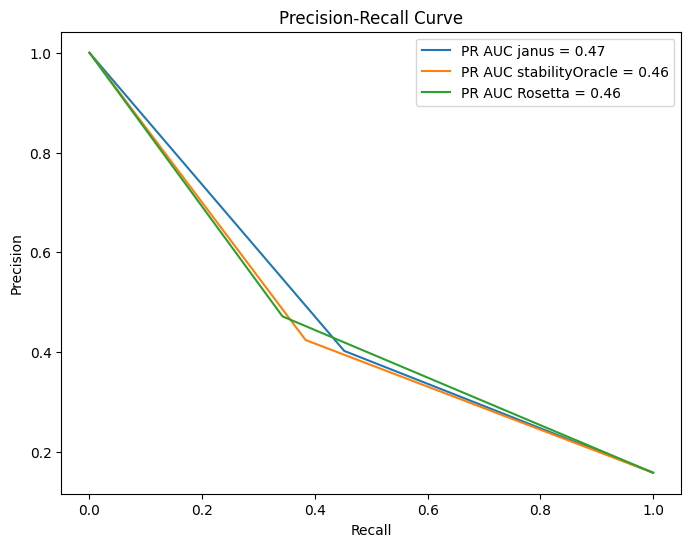

PR AUC: 0.46


In [16]:
from sklearn.metrics import precision_recall_curve, auc

# Calcolare precisione e recall
precision_oracle, recall_oracle, _ = precision_recall_curve(df1['ddG_dir']>0, df1['Stability-Oracle']>0)
precision_rosetta, recall_rosetta, _ = precision_recall_curve(df1['ddG_dir']>0, df1['Rosetta Cartesian ddg']>0)

precision_janus, recall_janus, _ = precision_recall_curve(df2['DDG']>0, df2['DDG_JanusDDG']>0)

# Calcolare l'AUC della Precision-Recall curve
pr_auc_janus = auc(recall_janus, precision_janus)
pr_auc_oracle = auc(recall_oracle, precision_oracle)
pr_auc_rosetta = auc(recall_rosetta, precision_rosetta)

# Visualizzare la PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_janus, precision_janus, label=f'PR AUC janus = {pr_auc_janus:.2f}')
plt.plot(recall_oracle, precision_oracle, label=f'PR AUC stabilityOracle = {pr_auc_stab:.2f}')
plt.plot(recall_rosetta, precision_rosetta, label=f'PR AUC Rosetta = {pr_auc_rosetta:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Stampa l'area sotto la curva PR
print(f"PR AUC: {pr_auc:.2f}")

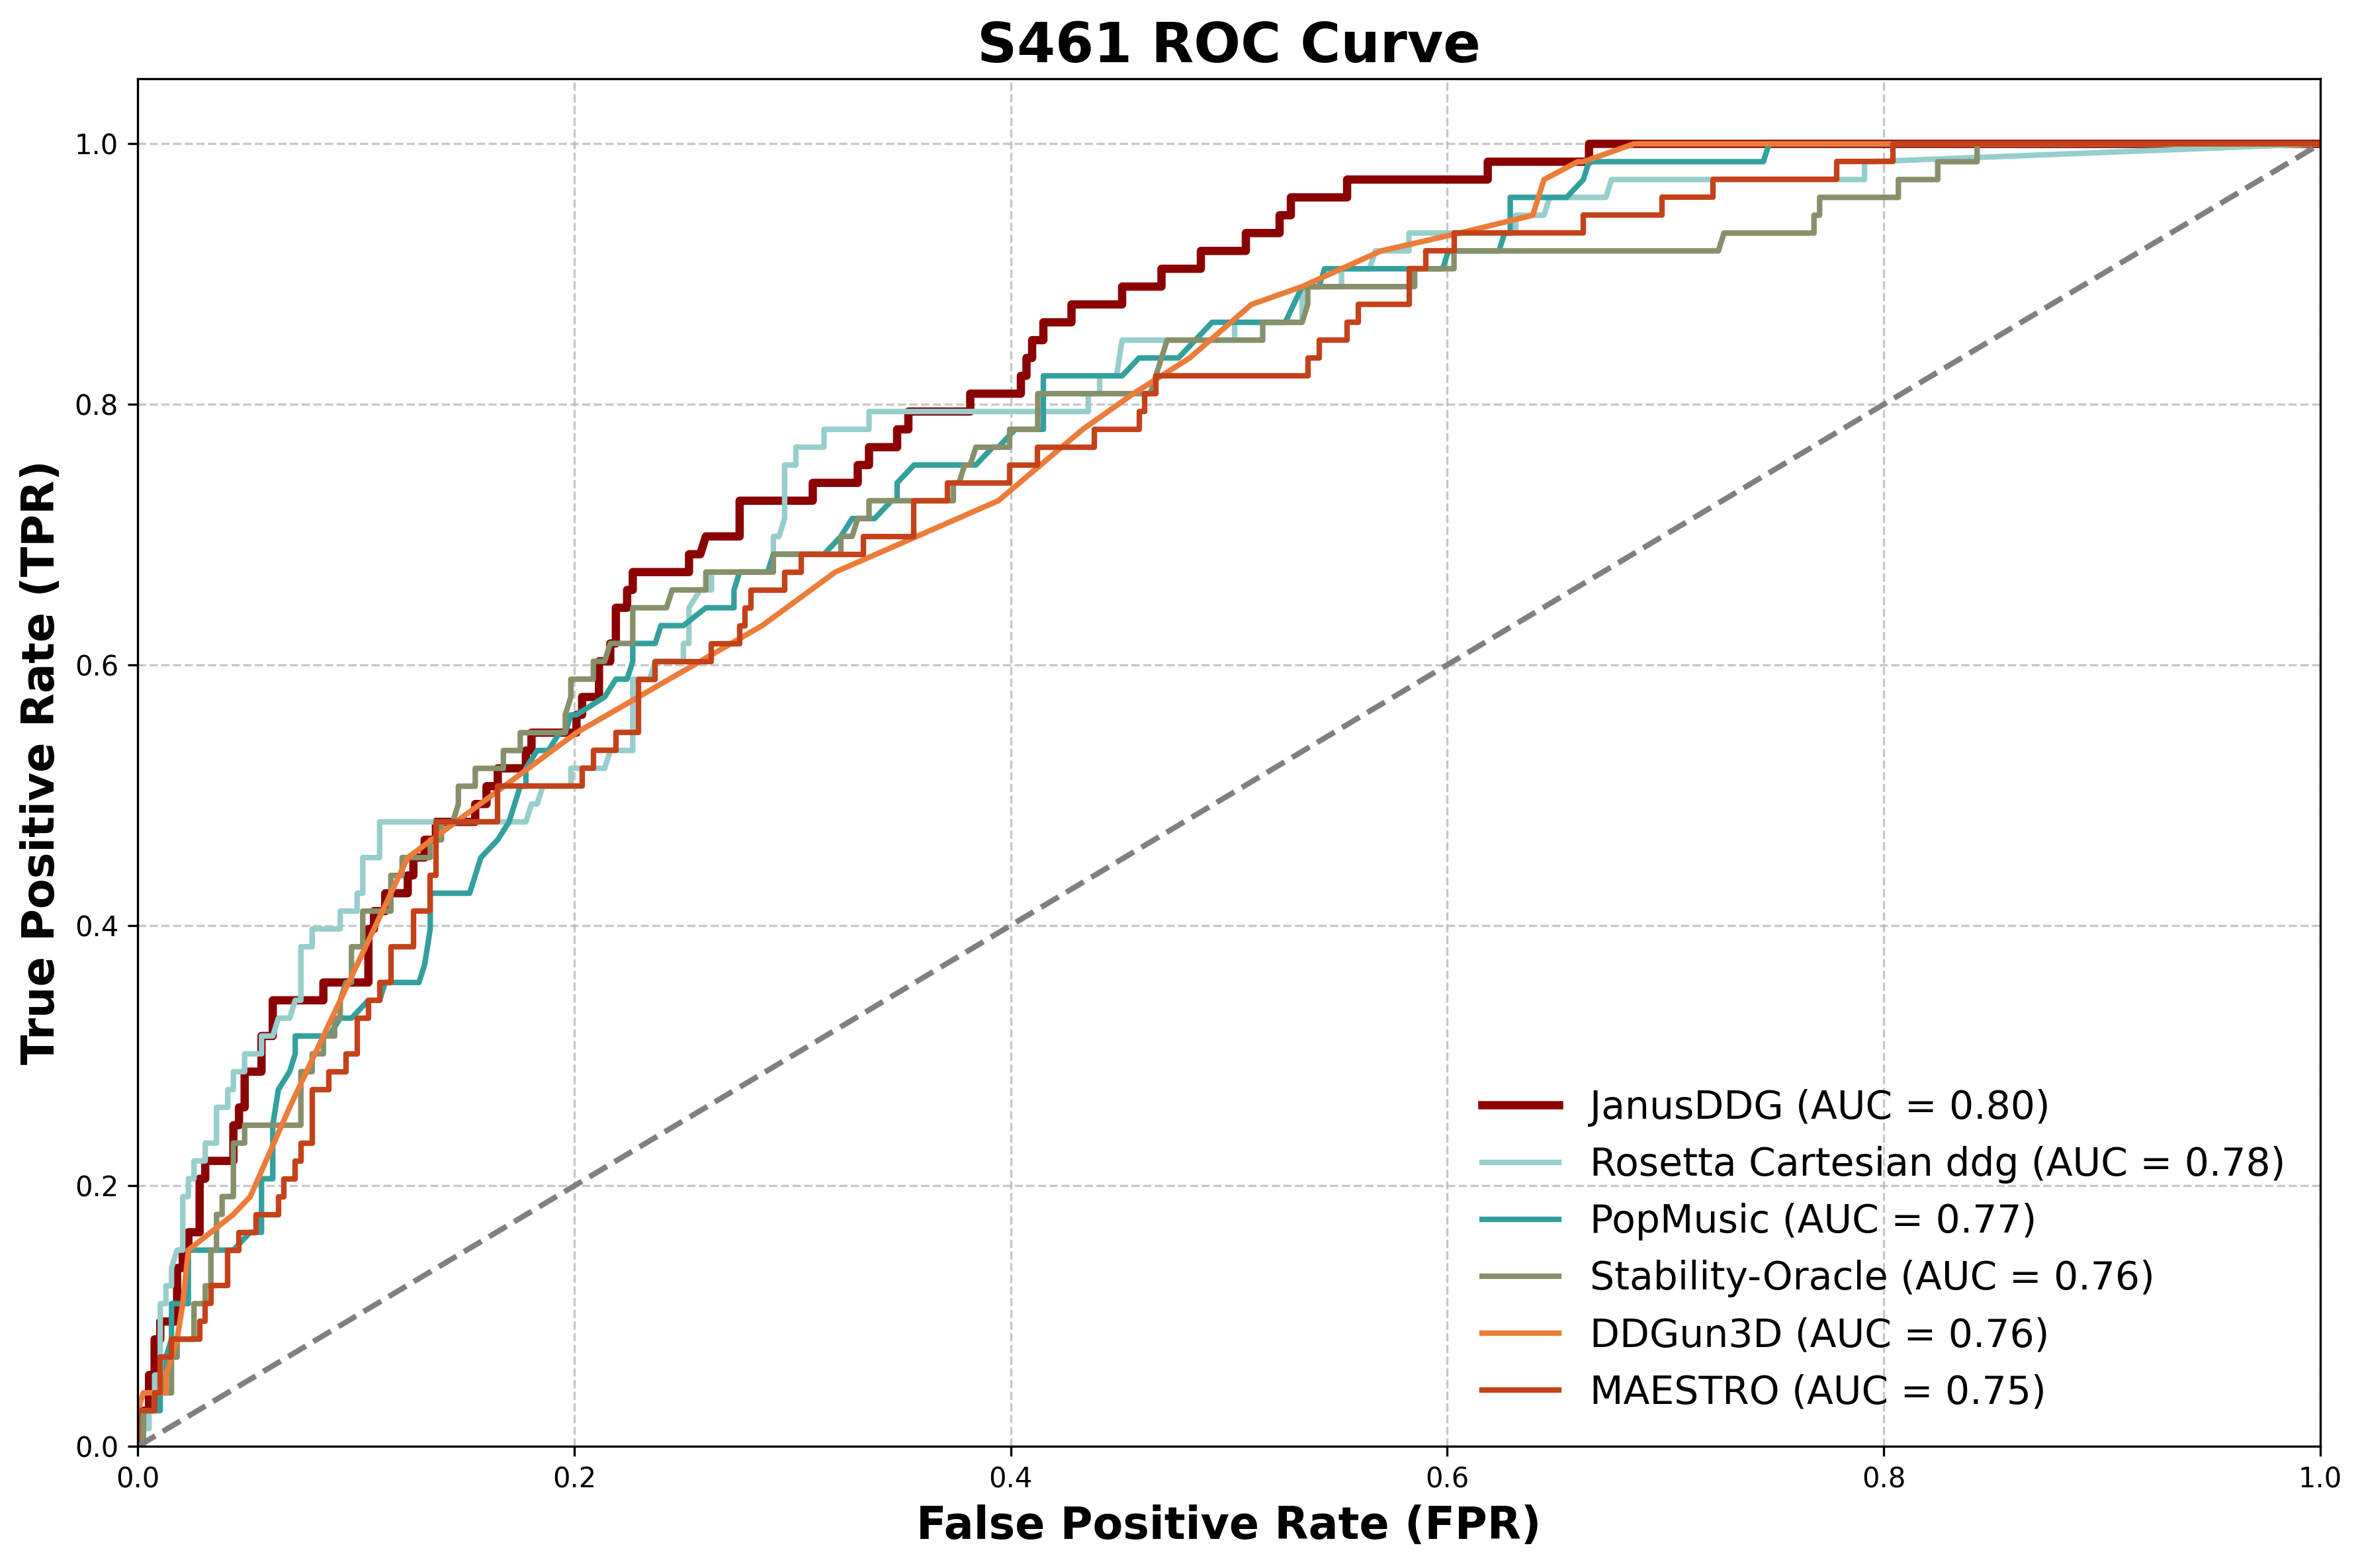

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.colors import LinearSegmentedColormap

# Definisci i colori personalizzati
custom_colors = ['#97CECC', '#12908E','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=len(model_columns))

# Genera la palette dai colori interpolati
palette = [cmap(i / (len(model_columns) - 1)) for i in range(len(model_columns))]

# Crea la figura con un DPI elevato per una migliore qualità
plt.figure(figsize=(12, 8), dpi=300)

# Plot ROC curve per JanusDDG con una linea più spessa e colore distintivo (rosso scuro)
plt.plot(fpr_janus, tpr_janus, color='darkred', label=f'JanusDDG (AUC = {auc_janus:.2f})', 
         linewidth=3)

# Plot di ogni modello con la nuova palette di colori
for i, model_name in enumerate(model_columns):
    m_n = model_name.split('_')[0]
    plt.plot(fprs[i], tprs[i], label=f'{m_n} (AUC = {auc_scores[i]:.2f})', 
             color=palette[i], linewidth=2)

# Plot della diagonale (classificatore casuale) come linea tratteggiata
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)

# Aggiunta del titolo e delle etichette con dimensione maggiore
plt.title('S461 ROC Curve', fontsize=20, fontweight='bold')
plt.xlabel('False Positive Rate (FPR)', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=16, fontweight='bold')

# Personalizzazione della legenda
plt.legend(loc='lower right', fontsize=14, frameon=False, markerscale=1.5)

# Aggiunta di una griglia per una migliore leggibilità
plt.grid(True, linestyle='--', alpha=0.7)

# Imposta i limiti degli assi per una visualizzazione chiara
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Miglioramenti finali per un aspetto più pulito
plt.tight_layout()

# Mostra il grafico
plt.show()


In [162]:
# from scipy.stats import kendalltau
# df = pd.read_csv('../git_JANUS_DDG/Results/Result_s669_to_process.csv')
# spearmanr(df['DDG_JanusDDG'].values, df['DDG'].values)

SignificanceResult(statistic=0.5544100812217307, pvalue=3.560433896534952e-55)

In [165]:
import pandas as pd

# Creazione del DataFrame
data = {
    "Method": [
        "SDM", "ThermoNet", "mCSM", "Dynamut", "I-Mutant3.0", "MAESTRO", "DUET", "ACDC-NN", "FoldX", "PoPMuSiC", "DDGun3D", "PremPS", "DDMut", "INPS3D", "GeoDDG-3D (old)", "RaSP", "Pythia", "ThermoMPNN",
        "MUPro", "I-Mutant3.0-Seq", "SAAFEC-SEQ", "ACDC-NN-Seq", "INPS-Seq", "DDGun", "PROSTATA", "Mutate everything (ESM-2)", "GeoDDG-Seq (old)", "SPIRED-Fitness (zero-shot)", "GeoStab v2", "SPIRED-Stab"
    ],
    "ρ": [0.31, 0.31, 0.33, 0.34, 0.34, 0.35, 0.38, 0.40, 0.41, 0.42, 0.43, 0.45, 0.46, 0.46, 0.50, 0.52, 0.55, 0.56,
          0.18, 0.22, 0.34, 0.39, 0.40, 0.45, 0.50, 0.50, 0.51, 0.54, 0.55, 0.58],
    "τ": [0.22, 0.22, 0.23, 0.25, 0.26, 0.26, 0.27, 0.30, 0.31, 0.30, 0.32, 0.33, 0.35, 0.35, 0.38, 0.39, 0.41, 0.42,
          0.13, 0.16, 0.26, 0.29, 0.28, 0.34, 0.36, 0.38, 0.39, 0.41, 0.43, 0.46],
    "r": [0.33, 0.38, 0.35, 0.34, 0.39, 0.40, 0.41, 0.42, 0.36, 0.45, 0.48, 0.48, 0.52, 0.48, 0.51, 0.50, 0.55, 0.53,
          0.21, 0.28, 0.39, 0.44, 0.44, 0.47, 0.53, 0.52, 0.52, 0.52, 0.54, 0.55],
    "Top-5": [0.33, 0.31, 0.39, 0.32, 0.39, 0.37, 0.40, 0.44, 0.36, 0.37, 0.41, 0.39, 0.44, 0.44, 0.53, 0.45, 0.49, 0.48,
               0.31, 0.33, 0.39, 0.43, 0.47, 0.44, 0.49, 0.41, 0.49, 0.51, 0.52, 0.59],
    "Top-10": [0.57, 0.54, 0.53, 0.52, 0.54, 0.59, 0.56, 0.57, 0.59, 0.63, 0.62, 0.58, 0.59, 0.59, 0.69, 0.62, 0.64, 0.63,
                0.53, 0.51, 0.54, 0.58, 0.56, 0.56, 0.62, 0.62, 0.63, 0.64, 0.69, 0.67]
}

# Creazione DataFrame
df = pd.DataFrame(data)

# Visualizza il DataFrame
df = df.rename(columns={'r':'Pearson','ρ':'Spearman','Method':'Feature'})
df

,Feature,Spearman,τ,Pearson,Top-5,Top-10
0,SDM,0.31,0.22,0.33,0.33,0.57
1,ThermoNet,0.31,0.22,0.38,0.31,0.54
2,mCSM,0.33,0.23,0.35,0.39,0.53
3,Dynamut,0.34,0.25,0.34,0.32,0.52
4,I-Mutant3.0,0.34,0.26,0.39,0.39,0.54
5,MAESTRO,0.35,0.26,0.40,0.37,0.59
6,DUET,0.38,0.27,0.41,0.40,0.56
7,ACDC-NN,0.40,0.30,0.42,0.44,0.57
8,FoldX,0.41,0.31,0.36,0.36,0.59
9,PoPMuSiC,0.42,0.30,0.45,0.37,0.63


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = ['#97CECC', '#12908E','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    edgecolor="black",  # Bordi per maggiore distinzione
    linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)

# Crea una colorbar separata
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)

# Mostra il grafico
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [97]:
assert False

AssertionError: 

In [6]:
import pandas as pd
import numpy as np
# Dizionario per salvare i risultati
pearson_dict = {}
spearmanr_dict = {}
error = {}


for model in columns_selected:
    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)
    pearson_dict[model] = pearsonr(dataset_2.loc[:,model].values,dataset_2.loc[:,target_col].values)[0]


for model in columns_selected:

    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)
    spearmanr_dict[model] = spearmanr(dataset_2.loc[:,model].values,dataset_2.loc[:,target_col].values)[0]

for model in columns_selected:

    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)

    # Calcola gli errori quadratici per ogni punto
    errors = (dataset_2.loc[:,model].values - dataset_2.loc[:,target_col].values) ** 2
    error[model] = np.std(errors, ddof=1)  #


In [6]:
error

{'stability-oracle_dir': 2.4841503265908007,
 'CartddgD_dir': 14.531319775965605,
 'PremPS_dir': 1.697504496976315,
 'PopMusic_dir': 2.1184668322813525,
 'MAESTRO_dir': 1.910726051894534,
 'INPS3D_dir': 2.0369048545789847,
 'DDGun3D_dir': 2.4936443846658047,
 'DUET_dir': 2.285936633765311,
 'ACDC-NN_dir': 2.305599228208544,
 'KORPMD_dir': 2.586339079962949,
 'mCSM_dir': 2.194913739707245,
 'SDM_dir': 2.871686029864074,
 'ThermoNet_dir': 2.709615276098299,
 'I-Mutant3.0_dir': 2.3191357747266355,
 'SAAFEC-Seq_dir': 2.3191357747266355,
 'mif_dir': 33.50882654649253,
 'ankh_dir': 38.95677393948727,
 'esm2_650M_dir': 27.485871330171094,
 'Dynamut_dir': 2.7402127908346854,
 'mpnn_20_00_dir': 7.49044831675103,
 'esm1v_mean_dir': 27.112615596856,
 'esmif_multimer_dir': 4.006163848947349,
 'mifst_dir': 36.47672492742873,
 'mutcomputex_dir': 3.259285401099035,
 'FoldXD_dir': 9.096127213480683,
 'tranception_dir': 4.118694315173764,
 'msa_transformer_mean_dir': 34.91339329213995}

In [9]:
pearson_dict['JanusDDG']=janus_pearson
spearmanr_dict['JanusDDG']=janus_spearman


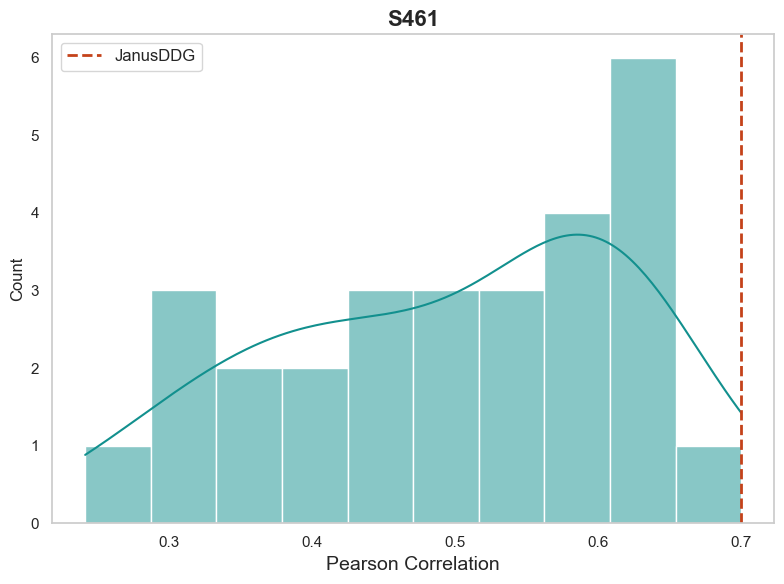

In [10]:


# Creiamo un DataFrame da seaborn-friendly
df_plot_pearson = pd.DataFrame(list(pearson_dict.items()), columns=["Feature", "Pearson"])

# Impostiamo lo stile per il grafico
sns.set_theme(style="whitegrid", palette="muted")

# Creiamo il grafico
plt.figure(figsize=(8, 6))


#'#F98F45'
#'#97CECC'
  #"#c4421A"      
#'#12908E'  

# Plottiamo la distribuzione dei valori
sns.histplot(df_plot_pearson["Pearson"], bins=10, color="#12908E", kde=True)

# Aggiungiamo la linea per la soglia
plt.axvline(x=janus_pearson, color='#c4421A', linestyle='--', linewidth=2, label="JanusDDG")

# Aggiungiamo il titolo e le etichette
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')
plt.xlabel("Pearson Correlation", fontsize=14)
#plt.ylabel("Frequenza", fontsize=14)

# Aggiungiamo la legenda
plt.legend(fontsize=12)
plt.grid(False)

# Aggiungiamo il testo accanto alla linea di soglia per maggiore chiarezza
#plt.text(0.68, 30, 'Soglia 0.67', color='red', verticalalignment='bottom', fontsize=12)

# Mostriamo il grafico
plt.tight_layout()  # Rende il grafico più compatto
plt.show()


In [11]:
df_plot_pearson['Feature'] = df_plot_pearson['Feature'].map(lambda x: x.split('_')[0][0].upper()+x.split('_')[0][1:])

/tmp/ipykernel_80700/3780282899.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


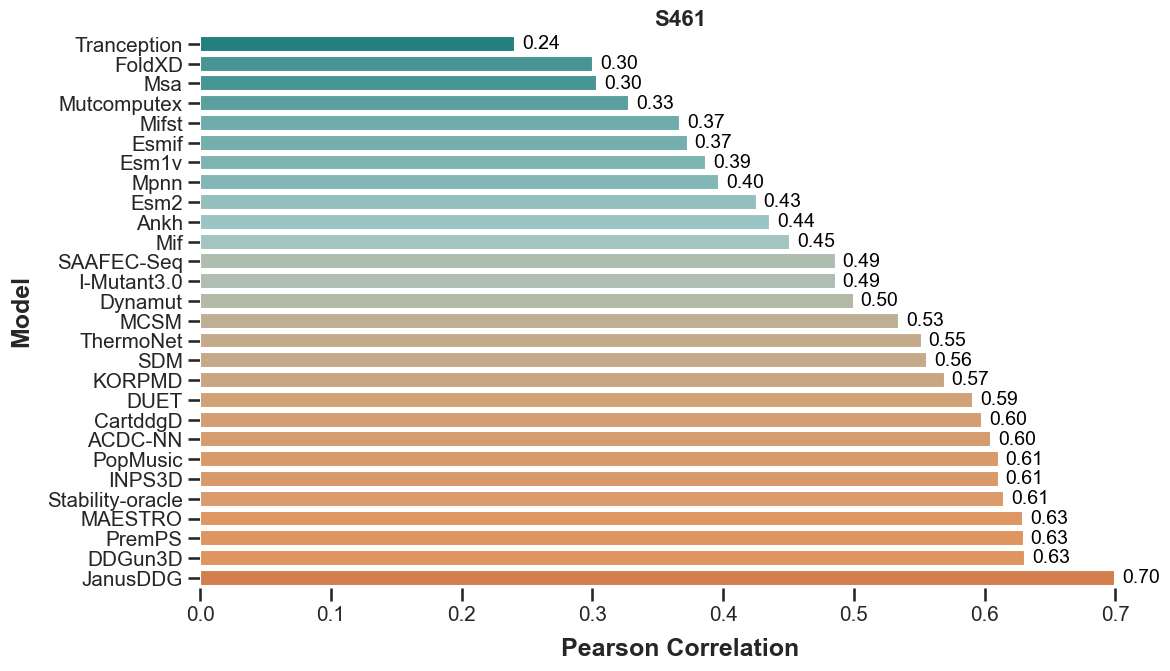

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_plot_pearson.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)

# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()



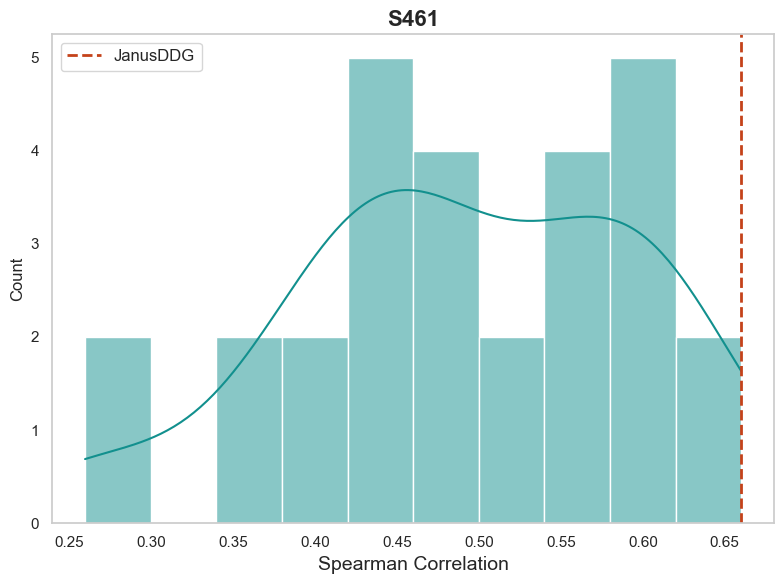

In [15]:


# Creiamo un DataFrame da seaborn-friendly
df_plot_spearman = pd.DataFrame(list(spearmanr_dict.items()), columns=["Feature", "Spearman"])

# Impostiamo lo stile per il grafico
sns.set_theme(style="whitegrid", palette="muted")

# Creiamo il grafico
plt.figure(figsize=(8, 6))


#'#F98F45'
#'#97CECC'
  #"#c4421A"      
#'#12908E'  

# Plottiamo la distribuzione dei valori
sns.histplot(df_plot_spearman["Spearman"], bins=10, color="#12908E", kde=True)

# Aggiungiamo la linea per la soglia
plt.axvline(x=janus_spearman, color='#c4421A', linestyle='--', linewidth=2, label="JanusDDG")

# Aggiungiamo il titolo e le etichette
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')
plt.xlabel("Spearman Correlation", fontsize=14)
#plt.ylabel("Frequenza", fontsize=14)

# Aggiungiamo la legenda
plt.legend(fontsize=12)

# Aggiungiamo il testo accanto alla linea di soglia per maggiore chiarezza
#plt.text(0.68, 30, 'Soglia 0.67', color='red', verticalalignment='bottom', fontsize=12)
plt.grid(False)
# Mostriamo il grafico
plt.tight_layout()  # Rende il grafico più compatto
plt.show()



In [16]:
df_plot_pearson

,Feature,Pearson
25,Tranception,0.241144
24,FoldXD,0.300649
26,Msa,0.303772
23,Mutcomputex,0.328421
22,Mifst,0.367107
21,Esmif,0.372826
20,Esm1v,0.386923
19,Mpnn,0.396908
17,Esm2,0.425774
16,Ankh,0.435929


/tmp/ipykernel_80700/1573424558.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


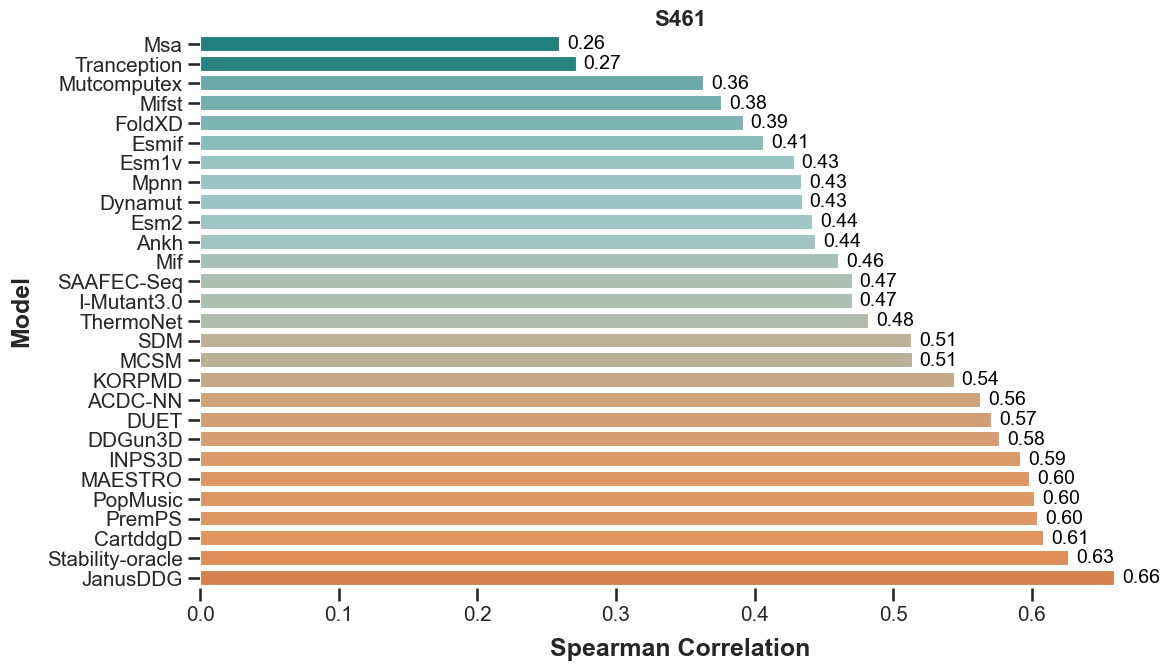

In [17]:
# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)
df_plot_spearman['Feature'] = df_plot_spearman['Feature'].map(lambda x: x.split('_')[0][0].upper()+x.split('_')[0][1:])
# Ordina i dati
df_plot_spearman = df_plot_spearman.sort_values(by="Spearman")

# Definisce i colori della palette personalizzata
custom_colors =['#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_spearman["Spearman"].min(), df_plot_spearman["Spearman"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_spearman["Spearman"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Spearman",
    data=df_plot_spearman,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Spearman Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Spearman Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [151]:
df_plot = df_plot_pearson
df_plot_pearson['Spearman'] = df_plot_spearman['Spearman']

,ID,MTS,DDG,Sequence,DDG_JanusDDG
0,P0A9D2,S11A,-1.800,MKLFYKPGACSLASHITLRESGKDFTLVSVDLMKKRLENGDDYFAV...,-0.114312
1,P00149,A125H,-2.690,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.131156
2,P00149,A87H,-1.980,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,0.160745
3,P00149,A112H,-1.700,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.135101
4,P00149,D24H,-1.360,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.349209
...,...,...,...,...,...
664,1fh5H,S15N,0.600,SGGGLVKPAGSLKLSCAASGFTFSSYYMYWVRQTPDKRLEWVATIS...,-0.574791
665,1iv7B,A73C,0.500,GEWEIIDIGPFTQNLGKFAVDEENKIGQYGRLTFNKVIRPCMKKTI...,1.591942
666,1iv7B,F89C,-2.500,GEWEIIDIGPFTQNLGKFAVDEENKIGQYGRLTFNKVIRPCMKKTI...,-1.236807
667,1iv7B,L62C,-1.900,GEWEIIDIGPFTQNLGKFAVDEENKIGQYGRLTFNKVIRPCMKKTI...,-1.299483


In [ ]:
##############################
################ààà

In [3]:
df_m28 = pd.read_csv('../git_JANUS_DDG/Results/Result_m28_test_set.csv')

In [8]:
pearsonr(df_m28['DDG'],df_m28['DDG_JanusDDG'])

PearsonRResult(statistic=0.6853305032221448, pvalue=5.718453737070528e-05)

In [7]:
df_m28

,Unnamed: 0,ID,MTS,DDG,DDGun,DDGun3D,Maestro,FoldX,Sequence,DDG_JanusDDG
0,0,1btlA,A17G_E79K_M157T,-4.3000,0.5,0.0,-0.11346,-0.884510,HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...,0.057079
1,1,1btlA,A17S_E79K,-0.3000,-0.2,-0.1,-0.03137,-0.461080,HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...,-0.577885
2,2,1btlA,E79K_M157T,-1.5000,0.3,0.1,-0.10197,-0.206160,HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...,0.303593
3,3,1fkbA,D37S_R42A,-0.1800,-0.6,-0.3,0.02025,-1.616570,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,-1.542078
4,4,1fkbA,E31Q_D32N,0.4600,0.3,0.1,0.02384,0.204000,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,0.065187
5,5,1fkbA,E31Q_D32N_H94N,0.8700,0.1,0.1,-0.01712,0.241418,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,1.155914
6,6,1fkbA,I91E_A95K,-2.3600,-1.9,-1.7,-0.53359,-3.664100,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,-3.236507
7,7,1fkbA,R40I_D41E,-1.4700,-0.1,-0.1,0.02639,-0.060014,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,-0.279191
8,8,1fkbA,R40I_D41E_R42E_N43Y_K44E,-1.8900,-0.3,-0.3,-0.10398,-1.978490,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,-2.299247
9,9,1fkbA,T21K_V23K_K47E,-2.8800,-0.9,-1.3,-0.55597,-0.768841,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...,-1.237849


In [17]:
dataset

,Unnamed: 0,ID,MTS,DDG,DDGun,DDGun3D,INPS-MD,Maestro,mCSM,FoldX,INPS,POPMUSIC,SDM,Unnamed: 13,Sequence
0,0,1jnxX,G139D,-3.97,-1.7,-0.7,-0.494357,-1.527449,-1.636,-7.556080,-0.842500,-1.61,-3.02,NaN,RMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAF...
1,1,1jnxX,V159A,-2.40,-1.9,-2.1,-2.952700,-1.872739,-2.453,-3.659150,-2.605510,-2.80,-2.66,NaN,RMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAF...
2,2,1jnxX,G57A,-1.12,1.6,1.9,1.142890,0.469797,-0.589,-0.259713,1.267090,-0.04,0.65,NaN,RMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAF...
3,3,2kj3A,K13A,1.50,0.3,0.1,-0.089365,0.286592,-0.011,-0.689648,-0.472503,-0.84,-0.43,NaN,MKIDAIVGRNSAKDIRTEERARVQLGNVVTAAALHGGIRISDQTTN...
4,4,2kj3A,G62A,-0.80,-1.8,-0.8,-0.750576,-0.927238,-0.896,-6.124440,-1.250420,-2.24,-0.77,NaN,MKIDAIVGRNSAKDIRTEERARVQLGNVVTAAALHGGIRISDQTTN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,1jnxX,A21S,0.16,-0.5,-0.7,-1.454550,-2.673804,-1.703,-0.935149,-0.913438,-1.42,-2.99,NaN,RMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAF...
92,92,1k85A,Y36F,-1.77,-1.2,-0.9,-1.168380,-1.225848,-1.242,-0.717820,-0.585723,-0.64,-0.54,NaN,HMAPTAPTNLASTAQTTSSITLSWTASTDNVGVTGYDVYNGTALAT...
93,93,1k85A,T46A,1.49,0.1,0.1,-0.501839,-0.719681,-0.862,0.770357,0.172518,-0.37,0.30,NaN,HMAPTAPTNLASTAQTTSSITLSWTASTDNVGVTGYDVYNGTALAT...
94,94,5cg0A,E240A,0.53,0.3,0.2,0.028468,0.057808,-0.378,-0.394450,0.026561,0.05,-0.10,NaN,QRRFPDDFLFGTATASYQIEGAWDEDGKGENIWDYMVHNTPEVIRD...


In [24]:
pd.read_csv('../git_JANUS_DDG/Results/Result_Megascale_S_firsts_100k.csv').columns

Index(['Sequence', 'MTS', 'ID', 'DDG', 'DDG_JanusDDG'], dtype='object')

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error

dataset = pd.read_csv('../git_JANUS_DDG/Results/Result_Megascale_D_full_seq.csv')

columns_selected = ['DDG_JanusDDG']


# Selezionare solo le colonne dei modelli e il valore vero (ddG_dir)
df_selected = dataset.loc[:, columns_selected + ['DDG']].fillna(0)

# Dizionario per salvare i risultati
results = {}

# Calcolare le metriche per ogni modello
for model in columns_selected:
    y_true = df_selected['DDG']
    y_pred = df_selected[model]
    
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    results[model] = {
        'Pearson': pearson_corr,
        'Spearman': spearman_corr,
        'RMSE': rmse,
        'MAE': mae
    }

# Convertire in DataFrame per stampa leggibile
results_df = pd.DataFrame(results).T
print(results_df)


              Pearson  Spearman      RMSE      MAE
DDG_JanusDDG  0.41247  0.436401  1.510077  1.19528


In [15]:
y_pred

0     G139D
1     V159A
2      G57A
3      K13A
4      G62A
      ...  
91     A21S
92     Y36F
93     T46A
94    E240A
95    L114C
Name: MTS, Length: 96, dtype: object

<Axes: >

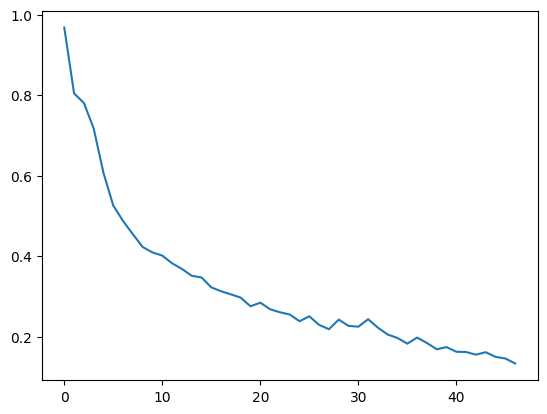

In [6]:
sns.lineplot([
    0.9685, 0.8048, 0.7809, 0.7176, 0.6070, 0.5258, 0.4876, 0.4547, 0.4229, 0.4095,
    0.4016, 0.3825, 0.3685, 0.3515, 0.3472, 0.3227, 0.3129, 0.3053, 0.2971, 0.2757,
    0.2846, 0.2682, 0.2608, 0.2552, 0.2385, 0.2507, 0.2294, 0.2187, 0.2425, 0.2270,
    0.2249, 0.2435, 0.2224, 0.2055, 0.1967, 0.1828, 0.1978,0.1844,0.1688,0.1742,0.1627,
0.1620,
0.1554,
0.1615,
0.1498,
0.1459,
0.1335])

In [ ]:
0.1742
Epoch 41: 0.1627
Epoch 42: 0.1620
Epoch 43: 0.1554
Epoch 44: 0.1615
Epoch 45: 0.1498
Epoch 46: 0.1459
Epoch 47: 0.1335

In [19]:
df = pd.read_csv('../git_JANUS_DDG/Results/Result_s669_to_process.csv')

In [20]:
id_counts = df['ID'].value_counts()

# Filtra gli ID che compaiono almeno 10 volte
valid_ids = id_counts[id_counts >= 10].index

# Mantieni solo le righe con ID validi
df_filtered = df[df['ID'].isin(valid_ids)]


In [24]:
(df_filtered['DDG'],df_filtered['DDG_JanusDDG'])

SignificanceResult(statistic=0.6209633681416611, pvalue=9.337797160188825e-50)

In [23]:
df_filtered

,ID,MTS,DDG,Sequence,DDG_JanusDDG
1,P00149,A125H,-2.69,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.131156
2,P00149,A87H,-1.98,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,0.160745
3,P00149,A112H,-1.70,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.135101
4,P00149,D24H,-1.36,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,-0.349209
5,P00149,D79H,-2.05,MKLRIATIAGLVVLGSGFAVAQTDVIAQRKAILKQMGEATKPIAAM...,0.135110
...,...,...,...,...,...
616,P11961,V144A,-2.00,MAFEFKLPDIGEGIHEGEIVKWFVKPGDEVNEDDVLCEVQNDKAVV...,-2.427172
617,P11961,V149A,-2.80,MAFEFKLPDIGEGIHEGEIVKWFVKPGDEVNEDDVLCEVQNDKAVV...,-2.498585
618,P11961,V149G,-4.10,MAFEFKLPDIGEGIHEGEIVKWFVKPGDEVNEDDVLCEVQNDKAVV...,-3.446333
619,P11961,V158A,-3.20,MAFEFKLPDIGEGIHEGEIVKWFVKPGDEVNEDDVLCEVQNDKAVV...,-1.997701
